# Tophat advection

## Lax-Friedrichs

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
u_initial = np.zeros_like(x)
u_initial[(x >= 4) & (x <= 6)] = 1

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LF=[]
l2norm_LF.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

nx= 501
dx= 0.02
dt= 0.01
Number of iterations= 2000.0


In [28]:
time = np.arange(0.0, t_final + 2*dt, dt)
t_final_values = [3.0,10.0,20.0]
solutions = []

In [29]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Solve the advection equation
while t <= t_final:
    # Check if t is in t_final_values
    if any(abs(t - val) <= dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions.append(u_current.copy())

    # Compute the new solution using the Lax-Friedrichs method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to using periodic boundary conditions
    #u_next = 0.5 * (np.roll(u_current, -1) + np.roll(u_current, 1)) - a * dt / (2 * dx) * (
    #       np.roll(u_current, -1) - np.roll(u_current, 1))
    u_next = 0.5*(np.roll(u_current, 1) + np.roll(u_current, -1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    # Update the solution
    u_current = u_next.copy()

    # Advance the time
    i += 1
    t = time[i]

    # Compute the l2 norm and add the time to the time vector
    l2norm_LF.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))

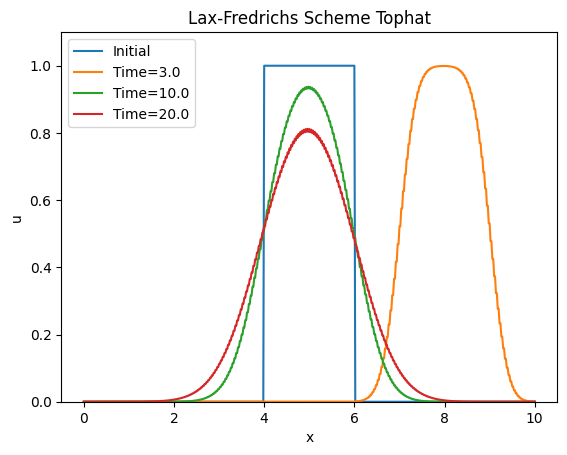

In [30]:
# Plot the final solution
plt.title('Lax-Fredrichs Scheme Tophat')
plt.plot(x, u_initial, label='Initial')

for i, solution in enumerate(solutions):
    plt.plot(x, solution, label='Time=' + str(t_final_values[i]))

plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig('Tophat LF.png')
plt.show()

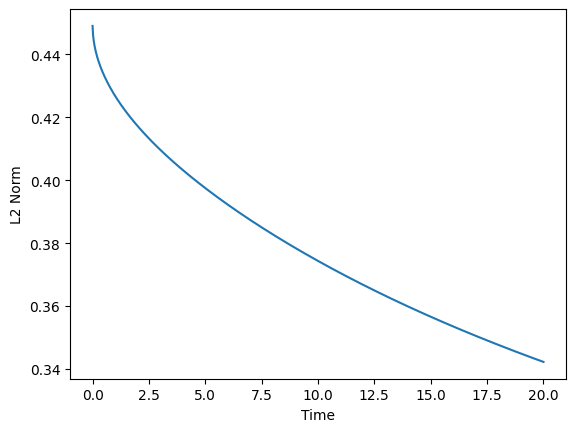

In [31]:
plt.plot(time,l2norm_LF)
plt.xlabel('Time')
plt.ylabel('L2 Norm')
plt.show()

# Lax-Wendroff

In [38]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

# Define the initial condition
u_initial = np.zeros_like(x)
u_initial[(x >= 4) & (x <= 6)] = 1

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_LW=[]
l2norm_LW.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

In [39]:
time = np.arange(0.0, t_final + 2*dt, dt)
t_final_values = [3.0,10.0,20.0]
solutions = []

In [40]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Solve the advection equation
while t <= t_final:
    # Check if t is in t_final_values
    if any(abs(t - val) <= dt/2 for val in t_final_values):
        # Append the current solution to the solutions list
        solutions.append(u_current.copy())
    # Compute the new solution using the Lax-Wendroff method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + ((a*dt/dx)**2/2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))   
    
    # Update the solution
    u_current = u_next.copy()
    
    
    # Advance the time
    i += 1
    t = time[i]
    
    #compute the l2 norm and add the time to the time vector
    l2norm_LW.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

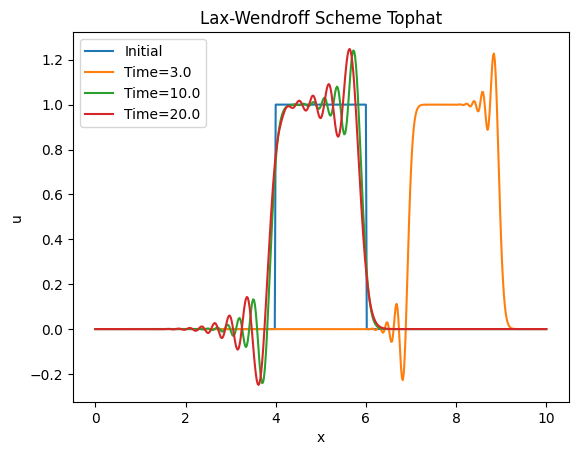

In [41]:
# Plot the final solution
plt.title('Lax-Wendroff Scheme Tophat')
plt.plot(x, u_initial, label='Initial')

for i, solution in enumerate(solutions):
    plt.plot(x, solution, label='Time=' + str(t_final_values[i]))

#plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig('Tophat LW.png')
plt.show()

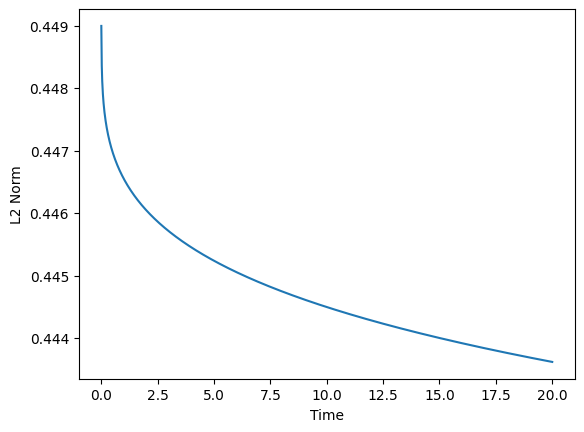

In [42]:
plt.plot(time,l2norm_LW)
plt.xlabel('Time')
plt.ylabel('L2 Norm')
plt.show()

## Norme a confronto

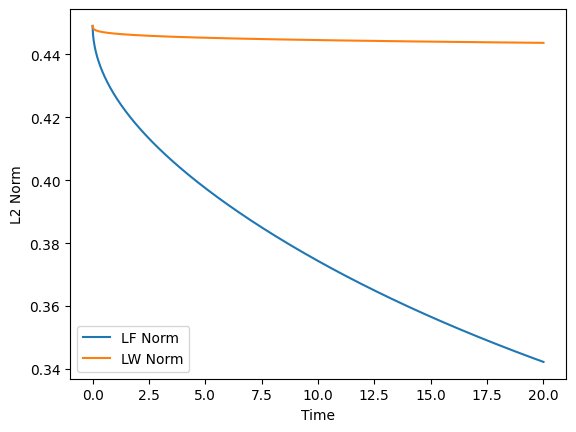

In [43]:
plt.plot(time,l2norm_LF,label='LF Norm')
plt.plot(time,l2norm_LW,label='LW Norm')
plt.xlabel('Time')
plt.ylabel('L2 Norm')
plt.legend()
plt.savefig('Tophat Norms.png')
plt.show()